In [1]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt 


!["chart"](download.png)

In [2]:
#load data
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.groupby(['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [7]:
df['Species'].value_counts()


Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:

freq_table = df.groupby(['Species']).size().reset_index(name='Count').rename(columns={'Sepcies':'Species'})
freq_table

,Species,Count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


<BarContainer object of 3 artists>

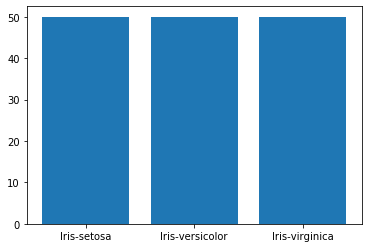

In [11]:
plt.bar(freq_table['Species'],freq_table['Count'])

In [12]:
df['SepalWidthCm'].mean()

3.0540000000000007

In [13]:
df['SepalWidthCm'].max()

4.4

In [14]:
df['SepalWidthCm'].min()

2.0

In [15]:
df['SepalWidthCm'].median()

3.0

In [16]:
df['SepalWidthCm'].mode()

0    3.0
dtype: float64

In [17]:
df['SepalWidthCm'].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C12AD7788>,
      dtype=object)

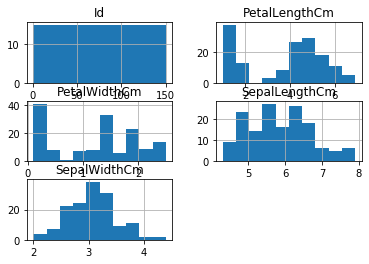

In [18]:
df.hist()'
'


Text(0, 0.5, 'count')

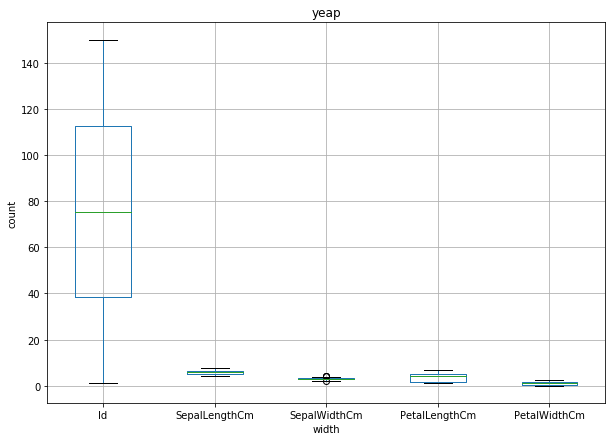

In [19]:
plt.figure(figsize = (10,7))
df.boxplot()
plt.title("yeap")
plt.xlabel('width')
plt.ylabel('count')

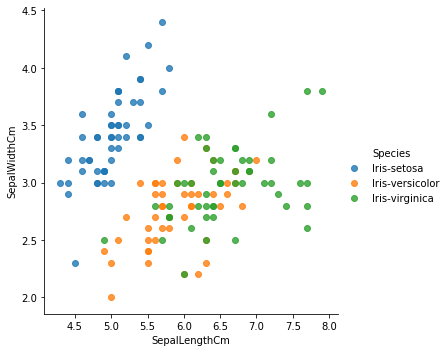

In [23]:
sns.lmplot(data=df,x='SepalLengthCm',y='SepalWidthCm',hue='Species',fit_reg=False)

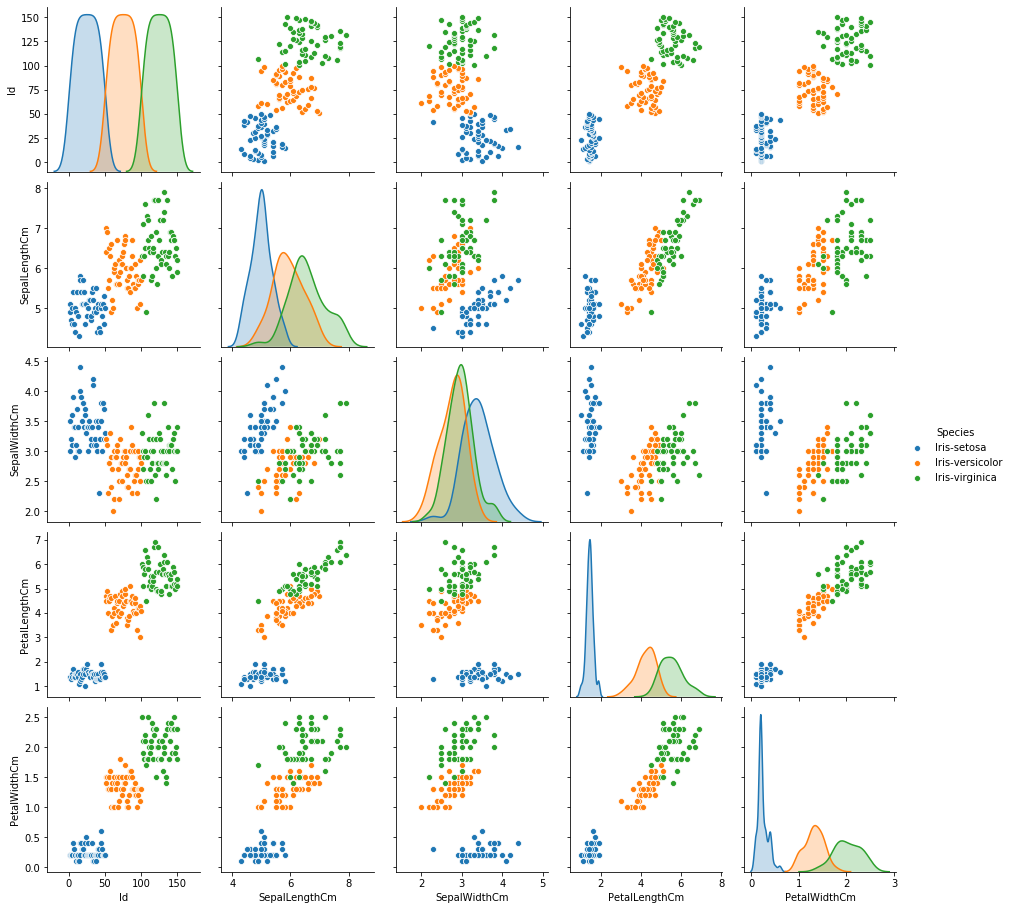

In [25]:
sns.pairplot(hue='Species',data=df)

In [26]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [27]:
df2 = pd.read_csv('Train.csv')
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
pd.crosstab(df2.Item_Type,df2.Outlet_Size)

Outlet_Size,High,Medium,Small
Item_Type,,,
Baking Goods,73,203,187
Breads,25,83,71
Breakfast,13,36,30
Canned,65,217,189
Dairy,80,218,198
Frozen Foods,92,274,249
Fruits and Vegetables,142,413,328
Hard Drinks,23,75,50
Health and Hygiene,61,170,136


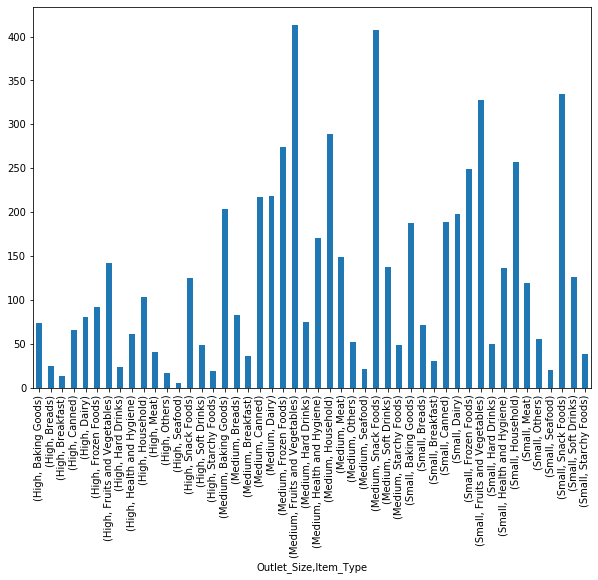

In [32]:
plt.figure(figsize = (10,7))
df_plot = df2.groupby(['Outlet_Size', 'Item_Type']).size()
df_plot.plot(x=df_plot.index, kind='bar', stacked=True)


In [34]:
df_mean = df.groupby(['Species']).mean().reset_index().drop(['Id'], axis=1).add_prefix('mean_')
df_var = df.groupby(['Species']).var().reset_index().drop(['Id','Species'], axis=1).add_prefix('var_')
df_count = df.groupby(['Species']).count().reset_index().drop(['Id', 'Species'], axis=1).add_prefix('count_')
pd.concat([df_mean, df_var, df_count], axis=1)

,mean_Species,mean_SepalLengthCm,mean_SepalWidthCm,mean_PetalLengthCm,mean_PetalWidthCm,var_SepalLengthCm,var_SepalWidthCm,var_PetalLengthCm,var_PetalWidthCm,count_SepalLengthCm,count_SepalWidthCm,count_PetalLengthCm,count_PetalWidthCm
0,Iris-setosa,5.006,3.418,1.464,0.244,0.124249,0.145180,0.030106,0.011494,50,50,50,50
1,Iris-versicolor,5.936,2.770,4.260,1.326,0.266433,0.098469,0.220816,0.039106,50,50,50,50
2,Iris-virginica,6.588,2.974,5.552,2.026,0.404343,0.104004,0.304588,0.075433,50,50,50,50
